# Principal Component Analysys (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating data
x = np.array([1.1, 1.3, 1.6, 1.4, 2.4, 2.8, 3.1, 3.4, 3.8, 4, 3.6, 4.1, 3.9, 4.6]) # x data
y = np.array([20.1, 30, 30.6, 30.2, 40.0, 40.5, 41, 43.4, 46.2, 48, 50.3, 60, 62, 64.2]) # y data

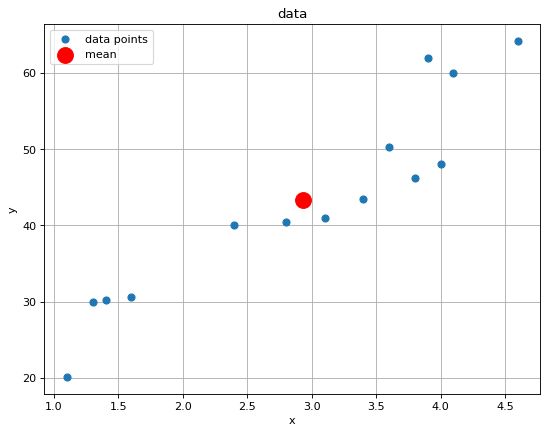

In [3]:
# Plotting data
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y, label="data points",zorder=2, s=40) # points
plt.scatter(x.mean(), y.mean(), c="r", s=200, label="mean", zorder=2)

plt.grid(1, zorder=1)
plt.legend()
plt.title("data")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Feature Scaling

In [4]:
x = x_ = (x - x.min()) / (x.max() - x.min())
y = y_ = (y - y.min()) / (y.max() - y.min())

x

array([0.        , 0.05714286, 0.14285714, 0.08571429, 0.37142857,
       0.48571429, 0.57142857, 0.65714286, 0.77142857, 0.82857143,
       0.71428571, 0.85714286, 0.8       , 1.        ])

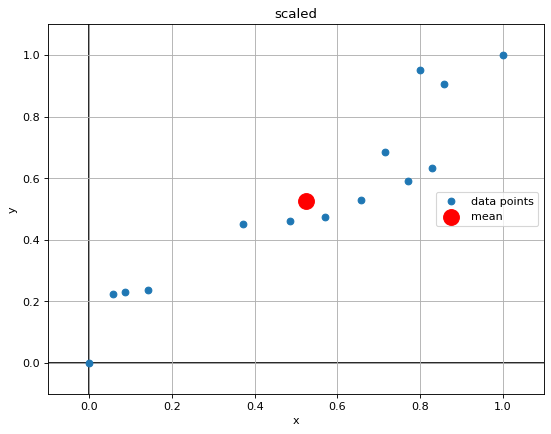

In [5]:
# Plotting data
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y, label="data points", zorder=3) # points
plt.plot([-0.1,1.1],np.zeros(2), "k", zorder=1) # line x = 0
plt.plot(np.zeros(2),[-0.1,1.1], "k", zorder=1) # line y = 0
plt.scatter(x.mean(), y.mean(), c="r", s=200, label="mean", zorder=2)

plt.grid(True)
plt.legend()
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title("scaled")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Mean Normalization

In [6]:
x -= x.mean() # subtracting mean
y -= y.mean()

x 

array([-0.5244898 , -0.46734694, -0.38163265, -0.43877551, -0.15306122,
       -0.03877551,  0.04693878,  0.13265306,  0.24693878,  0.30408163,
        0.18979592,  0.33265306,  0.2755102 ,  0.4755102 ])

In [7]:
print(f"now means of our features are equal to 0\n{x.mean().round() = }\n{y.mean().round() = }")

now means of our features are equal to 0
x.mean().round() = 0.0
y.mean().round() = -0.0


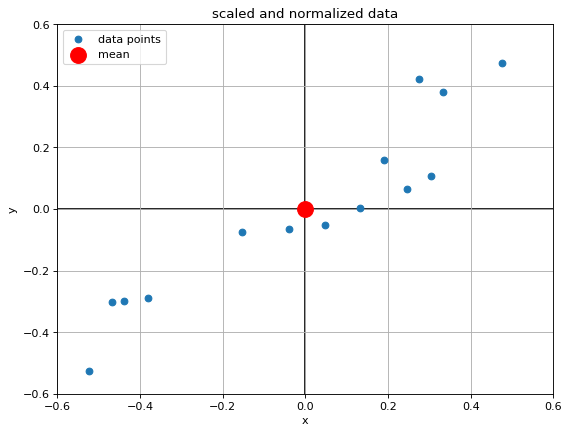

In [8]:
# Plotting data
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y, label="data points", zorder=2) # points
plt.plot([-0.6,0.6],np.zeros(2), "k", zorder=1) # line x = 0
plt.plot(np.zeros(2),[-0.6,0.6], "k", zorder=1) # line y = 0
plt.scatter(x.mean(), y.mean(), c="r", s=200, label="mean", zorder=3)

plt.grid(True)
plt.legend()
plt.xlim([-0.6,0.6])
plt.ylim([-0.6,0.6])
plt.title("scaled and normalized data")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Calculating Covariance Matrix

In [9]:
# Creating matrix out of my feature vectors
X = np.vstack([-x, -y]) # "-" fix
X

array([[ 0.5244898 ,  0.46734694,  0.38163265,  0.43877551,  0.15306122,
         0.03877551, -0.04693878, -0.13265306, -0.24693878, -0.30408163,
        -0.18979592, -0.33265306, -0.2755102 , -0.4755102 ],
       [ 0.52656301,  0.30207321,  0.28846777,  0.29753806,  0.07531584,
         0.06397797,  0.0526401 , -0.00178167, -0.06527373, -0.10609006,
        -0.15824425, -0.3781989 , -0.42355037, -0.47343699]])

In [10]:
# Creating covariance matrix 
X_cov = np.cov(X) # or X @ X.T
X_cov.shape

(2, 2)

# Calculating Eigectors and Eigenvalues

In [11]:
eig_val, eig_vec = np.linalg.eig(X_cov) # can also use np.linalg.svd(X_cov)
eig_vec

array([[ 0.75429583, -0.65653469],
       [ 0.65653469,  0.75429583]])

In [12]:
eig_vec_1d = eig_vec[:,0]
eig_vec_1d

array([0.75429583, 0.65653469])

# Transforming Original Data into 1 dim

In [13]:
new_data1 = np.dot(eig_vec_1d, X).reshape(-1, 1)
new_data1

array([[ 0.74132735],
       [ 0.55083939],
       [ 0.47725302],
       [ 0.5263106 ],
       [ 0.16490091],
       [ 0.07125196],
       [-0.00084567],
       [-0.10122938],
       [-0.22911936],
       [-0.29901931],
       [-0.24705511],
       [-0.49921951],
       [-0.48589171],
       [-0.66950317]])

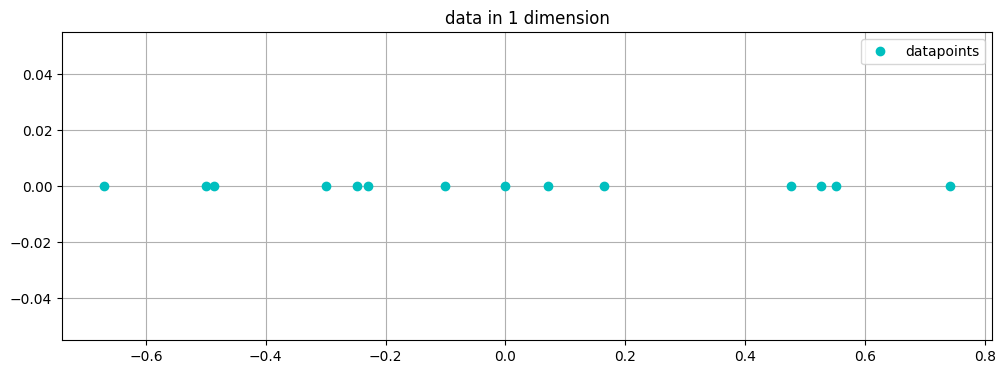

In [14]:
plt.figure(figsize=(12,4))
plt.plot(new_data1, np.zeros_like(new_data1), 'o', c="c", label="datapoints") # ploting the data
plt.grid()
plt.title("data in 1 dimension")
plt.legend()
plt.show();

# Testing Results Using PCA From Sklearn

In [15]:
Y = np.vstack([x_, y_]).T # creating matrix out of my feature vectors

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(Y)
new_data2 = pca.transform(Y)

new_data2

array([[ 0.74132735],
       [ 0.55083939],
       [ 0.47725302],
       [ 0.5263106 ],
       [ 0.16490091],
       [ 0.07125196],
       [-0.00084567],
       [-0.10122938],
       [-0.22911936],
       [-0.29901931],
       [-0.24705511],
       [-0.49921951],
       [-0.48589171],
       [-0.66950317]])

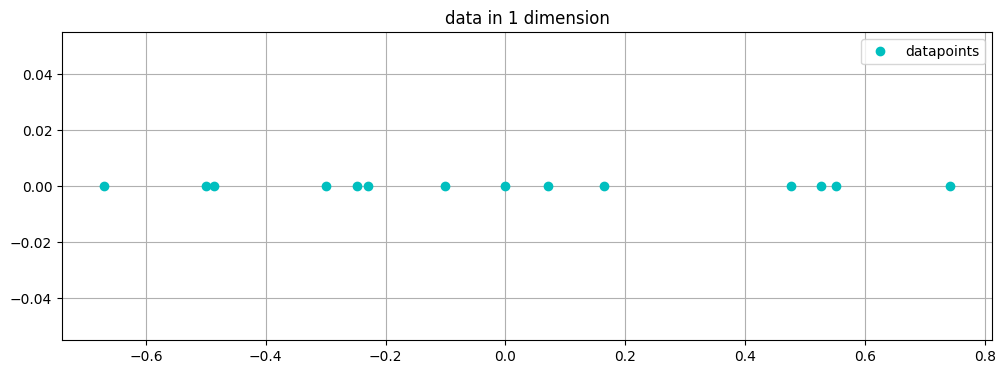

In [16]:
plt.figure(figsize=(12,4))
plt.plot(new_data2, np.zeros_like(new_data2), 'o', c="c", label="datapoints") # ploting the data
plt.grid()
plt.title("data in 1 dimension")
plt.legend()
plt.show();

In [17]:
# Checking equality of numbers

data1 = np.round(new_data1, 6) # removing floating point error
data2 = np.round(new_data2, 6) 

print("Is equal: ")
for i, j in zip (data1, data2):
    print(i == j, i, j)

Is equal: 
[ True] [0.741327] [0.741327]
[ True] [0.550839] [0.550839]
[ True] [0.477253] [0.477253]
[ True] [0.526311] [0.526311]
[ True] [0.164901] [0.164901]
[ True] [0.071252] [0.071252]
[ True] [-0.000846] [-0.000846]
[ True] [-0.101229] [-0.101229]
[ True] [-0.229119] [-0.229119]
[ True] [-0.299019] [-0.299019]
[ True] [-0.247055] [-0.247055]
[ True] [-0.49922] [-0.49922]
[ True] [-0.485892] [-0.485892]
[ True] [-0.669503] [-0.669503]


As we can see, the results are the same.